In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [11]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
#engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# Create path to sqlite
database_path = "../Resources/hawaii.sqlite"

# Create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")

In [14]:
# Declare a Base using `automap_base()`
Base = automap_base()




In [16]:
# Use the Base class to reflect the database tables
#Base.prepare(engine, reflect=True)

Base.prepare(autoload_with=engine)


In [19]:
# Print all of the classes mapped to the Base
Base.classes.items()
print(Base.classes.keys())

['station', 'measurement']


In [20]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
measurement = Base.classes.measurement
station = Base.classes.station

In [21]:
# Create a session
Session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
recent_date = Session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
most_recent_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - dt.timedelta(days=365)




In [26]:
# Perform a query to retrieve the data and precipitation scores
query = Session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()
query



[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

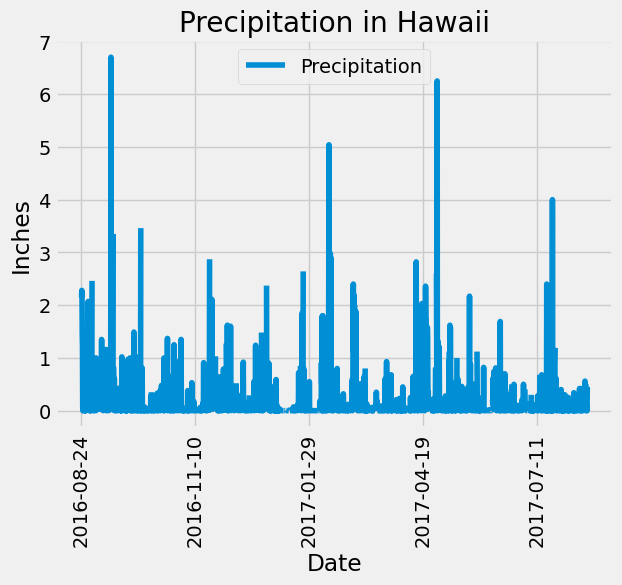

In [27]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
query_df = pd.DataFrame(query, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
query_sorted = query_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
query_sorted.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation in Hawaii')
plt.show()

In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
query_sorted.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
total_stations = Session.query(station.station).count()
total_stations


9

In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = Session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_id = most_active_stations[0][0]
most_active_id
lowest_temp = Session.query(func.min(measurement.tobs)).filter(measurement.station == most_active_id).all()
highest_temp = Session.query(func.max(measurement.tobs)).filter(measurement.station == most_active_id).all()
average_temp = Session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active_id).all()
lowest_temp, highest_temp, average_temp

([(54.0,)], [(85.0,)], [(71.66378066378067,)])

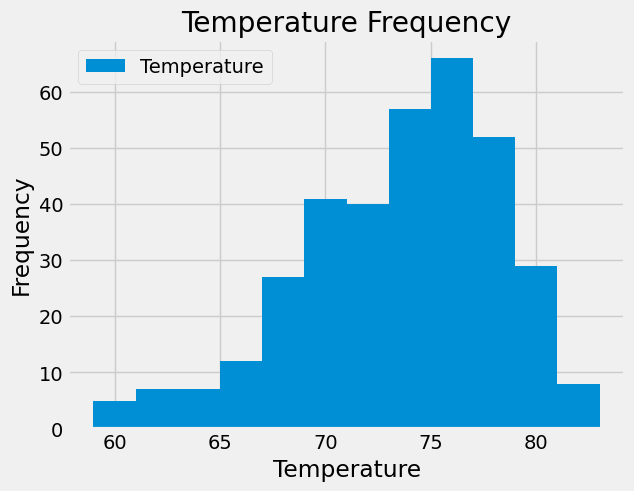

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_temp = Session.query(measurement.tobs).filter(measurement.date >= one_year_ago).filter(measurement.station == most_active_id).all()
last_12_months_temp_df = pd.DataFrame(last_12_months_temp, columns=['Temperature'])
last_12_months_temp_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Frequency')
plt.show()


# Close Session

In [35]:
# Close Session
Session.close()
